<a href="https://colab.research.google.com/github/prakhar-kt/Pytorch_projects/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
w = 0.7
b = 0.3

start = 0
end = 1
step = 0.02

x = torch.arange(start,end,step).unsqueeze(dim=1)
y = w * x + b

x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [18]:
train_split = int(0.8 * len(x))
X_train, y_train = x[:train_split], y[:train_split]
X_test, y_test = x[train_split:], y[train_split:]

In [43]:
def plot_predictions(xtrain=X_train, 
                     ytrain=y_train,
                     xtest=X_test,
                     ytest=y_test,
                     predictions=None):
    
    plt.scatter(xtrain,ytrain, c='b', s=4,label='Training Data')
    plt.scatter(xtest,ytest, c='g', s=4, label='Test Data')
    
    if predictions is not None:
        plt.scatter(xtest,predictions, c='r', s=4, label='Predictions')

    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Training, Test and Predictions data")
    plt.legend();

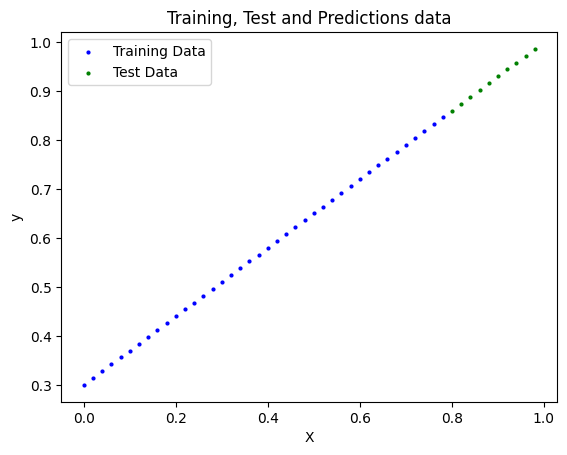

In [29]:
plot_predictions(X_train, y_train, X_test, y_test)

In [10]:
class LinearRegressionModel(nn.Module):

    
    
    def __init__(self):

        super().__init__()

        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    
    def forward(self, x: torch.tensor) -> torch.tensor:

        return self.linear_layer(x)



In [11]:
model_1 = LinearRegressionModel()

In [12]:
model_1

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [13]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.2536]])),
             ('linear_layer.bias', tensor([0.7230]))])

In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [30]:
next(model_1.parameters()).device

device(type='cpu')

In [31]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [32]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [34]:
epochs=1000

In [36]:
epoch_counts = []
training_losses = []
test_losses = []

for epoch in range(epochs):

    model_1.train()

    y_pred = model_1(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)
        
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        epoch_counts.append(epoch)
        training_losses.append(loss)
        test_losses.append(test_loss)

        print(f"Epoch {epoch}: Training Loss {loss}: Test Loss {test_loss}")



Epoch 0: Training Loss 0.19409409165382385: Test Loss 0.42596951127052307
Epoch 100: Training Loss 0.1589544415473938: Test Loss 0.3707478940486908
Epoch 200: Training Loss 0.1246127337217331: Test Loss 0.2907722294330597
Epoch 300: Training Loss 0.09026798605918884: Test Loss 0.2101094275712967
Epoch 400: Training Loss 0.05592761188745499: Test Loss 0.1301315277814865
Epoch 500: Training Loss 0.021581456065177917: Test Loss 0.04946677014231682
Epoch 600: Training Loss 0.004532742314040661: Test Loss 0.010834962129592896
Epoch 700: Training Loss 0.004532742314040661: Test Loss 0.010834962129592896
Epoch 800: Training Loss 0.004532742314040661: Test Loss 0.010834962129592896
Epoch 900: Training Loss 0.004532742314040661: Test Loss 0.010834962129592896


In [37]:
print(model_1.state_dict())

OrderedDict([('linear_layer.weight', tensor([[0.6962]])), ('linear_layer.bias', tensor([0.3060]))])


In [38]:
predictions = model_1(X_test)

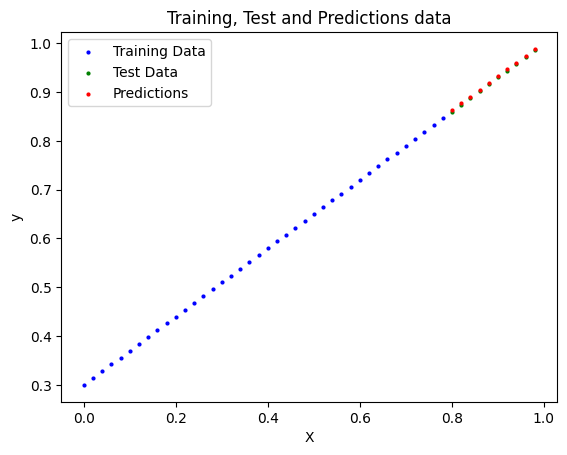

In [46]:
plot_predictions(predictions=predictions.detach().numpy())

In [48]:
from pathlib import Path

model_path = Path('models')
model_path.mkdir(parents=True,exist_ok=True)

In [49]:
model_name = 'linear_reg_model_1.pth'
model_dir = model_path / model_name

In [50]:
model_dir

PosixPath('models/linear_reg_model_1.pth')

In [51]:
torch.save(obj=model_1.state_dict(),
           f=model_dir)

In [52]:
loaded_model_1 = LinearRegressionModel()

loaded_model_1.load_state_dict(torch.load(model_dir))

loaded_model_1.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [54]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

predictions == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])